Co-occurance
1. 3 co-occurrence plots next to each other
    - [ ] Use default colouring
    - [ ] For maybe 5 sizes
    - [ ] Do 1 version without any clustering
    - [ ] Do 1 other version with clustering using 2000 runs
    - [ ] Use entire set, not only training data

In [2]:
import numpy as np
import os
import json
import sys
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

sys.path.append("../")
import src.plot as myplot
import seaborn as sns


In [75]:
import importlib
import src.plot as myplot
importlib.reload(myplot)

<module 'src.plot' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/0_classifier/paper_plots/../src/plot.py'>

In [4]:
samples_path = '../OUTPUT/sample_sizes/'
fname = 'MCMs_'

In [11]:
# 2. For a sample size, compute the fraction of correct members in the group of each icc
# that is get the partition map and check fraction overlap between rows in where the 1s are excluding diagonal
nr_runs = 10
digit = 0

sample_sizes = [10, 1000 ,2000,3000, 5423]
# sample_sizes = [10, 1000 ,2000,3000, 6315]

coo_sum = np.empty((5,121,121),dtype=int)
n_samples = 10
mcm_all_com = []
for s, sample_size in enumerate(sample_sizes):
    # load runs
    mcm_sample = []
    mcms_path = os.path.join(samples_path, str(sample_size), "MCMs")
    for i in range(n_samples): #len(os.listdir(mcms_path))):
        with open(os.path.join(mcms_path, fname+str(i)+ ".json")) as f:
                mcm_sample.append(json.load(f))
    mcm_0_multisample = np.array([myplot.create_cooccurance_matrix(mcm_sample[i][digit]) for i in range(nr_runs)],dtype=int)
    coo_sum[s,:,:] = np.sum(mcm_0_multisample,axis=0)
    mcm_all_com.append(mcm_sample)




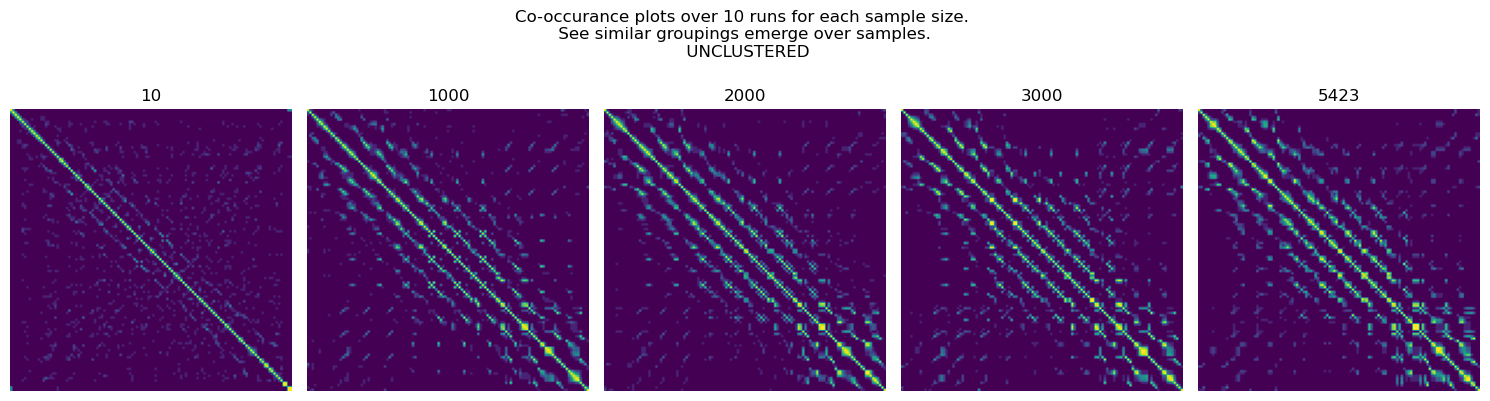

In [12]:
fig, axs = plt.subplots(1, 5, figsize=(15, 5))

for i, ax in enumerate(axs):
    ax.imshow(coo_sum[i,:,:], cmap='viridis')
    ax.axis('off')
    ax.set_title(f'{sample_sizes[i]}')

plt.tight_layout()
plt.suptitle("Co-occurance plots over 10 runs for each sample size. \n See similar groupings emerge over samples. \n UNCLUSTERED")
plt.savefig("../figures/co-occurance_noclust2k.png", dpi=300, bbox_inches="tight")


['0000000000000000000000000000000000000000000000000000000000000000000000000000000000000101000000010100000001010000000111000',
 '0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001100000000011110000000111000000',
 '0000000000000000000000000000000000000000000000000000000000000000000000000100000000011010000011101000000000100000000000000',
 '0000000000000000100000000011000000001100000000110000000001000000000010000000000100000000000000000000000000000000000000000',
 '0000000000000000000000000000000000000000000001000000001010000000010100000000101000000000010000000000100000000000000000000',
 '0000000000000000000000000000000000000000000000000000000000001100000000111000000001100000000000000000000000000000000000000',
 '0000000000000001000000000100000000010010000000001000000000110000000001000000000010000000000000000000000000000000000000000',
 '00000000000000000000000000000011000000000110000000001100000000011000000000110000000000000000000000000000000000000000

10

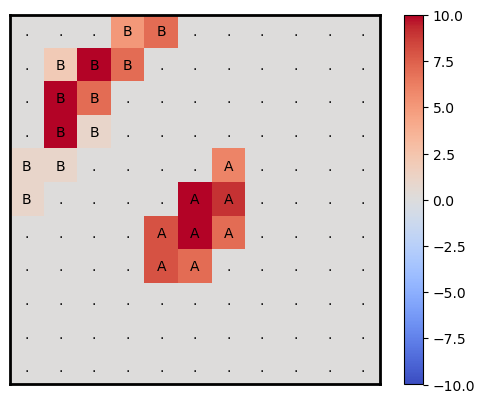

In [80]:
mcms_5k = mcm_all_com[-1]
digit = 0

pixel_idx = 34


icc_loc = np.zeros((11,11))
icc_sum = np.zeros((11,11))

for pixel_idx in [34,60]:
    row_i = pixel_idx // 11
    col_i = pixel_idx % 11
    for mcms in mcms_5k:
        comm = myplot.generate_icc_comms_map(mcms[digit])
        icc_sum += np.where(comm==comm[row_i,col_i], 1,0)
    icc_loc += np.where(icc_sum>0,1,0).astype(int)

    



letters = myplot.int_to_letters(icc_loc.astype(int),first_ascii = 64)
letters[letters == "@"] = "."
myplot.partition_map(plt.gca(), icc_sum,letters, None)
# 60, 34
# np.where(myplot.int_to_letters(np.clip(icc_sum,0,1).astype(int))== "B", "A","")

In [73]:
import numpy as np

# Assuming your array is named 'letters'
letters = np.array([['A', 'A', 'A', 'C', 'C', 'A', 'A', 'A', 'A', 'A', 'A'],
                    ['A', 'C', 'C', 'C', 'A', 'A', 'A', 'A', 'A', 'A', 'A'],
                    ['A', 'C', 'C', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A'],
                    ['A', 'C', 'C', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A'],
                    ['C', 'C', 'A', 'A', 'A', 'A', 'B', 'A', 'A', 'A', 'A'],
                    ['C', 'A', 'A', 'A', 'A', 'B', 'B', 'A', 'A', 'A', 'A'],
                    ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'A', 'A', 'A', 'A'],
                    ['A', 'A', 'A', 'A', 'B', 'B', 'A', 'A', 'A', 'A', 'A'],
                    ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A'],
                    ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A'],
                    ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A']])

# Remove all 'A's from the array
letters = letters.astype(str)
letters = letters[letters != 'A']
letters = np.char.add(letters, -1)


print(letters)


TypeError: can only concatenate str (not "numpy.int64") to str

dtype('<U1')

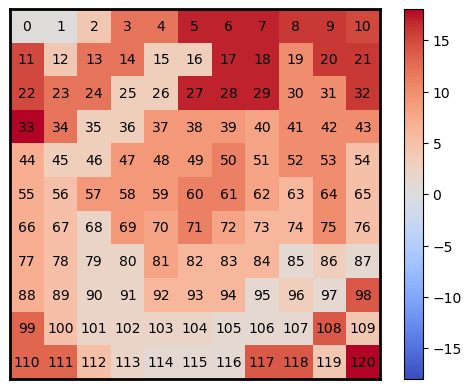

In [53]:
myplot.partition_map(plt.gca(), comm,np.arange(121).reshape((11,11)), None)

In [6]:
coo_clust = np.empty(coo_sum.shape)
for i, coo in enumerate(coo_sum):
    coo_clust[i,:,:] = myplot.do_cluster(coo, coo_sum[2,:,:])

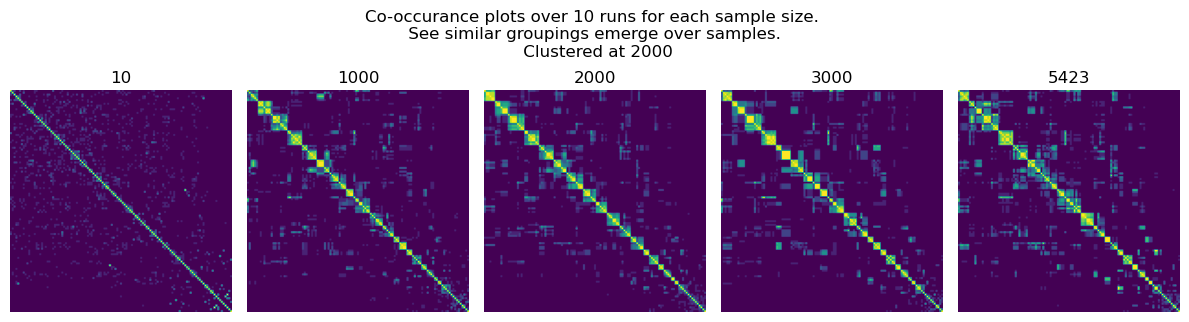

In [7]:
scale = 1
fig, axs = plt.subplots(1, 5, figsize=(12*scale, 4*scale))

for i, ax in enumerate(axs):
    ax.imshow(coo_clust[i,:,:], cmap='viridis')
    ax.axis('off')
    ax.set_title(f'{sample_sizes[i]}')

plt.tight_layout()
plt.suptitle("Co-occurance plots over 10 runs for each sample size. \n See similar groupings emerge over samples. \n Clustered at 2000")
plt.savefig("../figures/co-occurance_clust2k.png", dpi=300, bbox_inches="tight")


In [8]:
out_filename_format

NameError: name 'out_filename_format' is not defined